<h2> Task 5. Implement Particle Swarm Optimization algorithm </h2>
Select a multidimensional function to optimize (e.g., Rosenbrock function, Rastrigin function, or Griewank function).


1.  Define a class for the particle that includes properties such as position, velocity, personal best position, and personal best value.
2.  Initialize a swarm of particles with random positions and velocities within defined boundaries.
3.  Implement PSO formula for position update
4.  Create a running loop, which perform the optimization


Best position: [3.48797143e-10 3.17962454e-09]
Best value: 0.000000


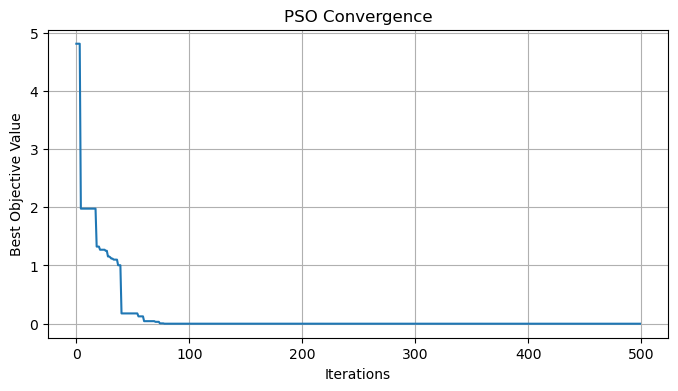

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + sum(x_i**2 - A * np.cos(2 * np.pi * x_i) for x_i in x)

class Particle:
    def __init__(self, dimensions, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dimensions)
        self.velocity = np.random.uniform(-1, 1, dimensions)
        self.best_position = self.position.copy()
        self.best_value = float('inf')

    def evaluate(self, objective_func):
        current_value = objective_func(self.position)
        if current_value < self.best_value:
            self.best_value = current_value
            self.best_position = self.position.copy()
        return current_value

    def update_velocity(self, global_best_position, w, c1, c2):
        r1 = np.random.random(len(self.position))
        r2 = np.random.random(len(self.position))
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best_position - self.position)
        self.velocity = w * self.velocity + cognitive + social

    def update_position(self, bounds):
        self.position += self.velocity
        self.position = np.clip(self.position, bounds[0], bounds[1])

def particle_swarm_optimization(objective_func, bounds, dimensions,
                                num_particles=30, max_iterations=500,
                                w=0.7, c1=2.0, c2=2.0):
    swarm = [Particle(dimensions, bounds) for _ in range(num_particles)]

    global_best_value = float('inf')
    global_best_position = None
    history = []

    for iteration in range(max_iterations):
        for particle in swarm:
            current_value = particle.evaluate(objective_func)
            if current_value < global_best_value:
                global_best_value = current_value
                global_best_position = particle.position.copy()

        for particle in swarm:
            particle.update_velocity(global_best_position, w, c1, c2)
            particle.update_position(bounds)

        history.append(global_best_value)

    return global_best_position, global_best_value, history

best_position, best_value, history = particle_swarm_optimization(
    rastrigin, (-5.12, 5.12), 2, num_particles=30, max_iterations=500
)

print(f"Best position: {best_position}")
print(f"Best value: {best_value:.6f}")

plt.figure(figsize=(8, 4))
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Best Objective Value")
plt.title("PSO Convergence")
plt.grid(True)
plt.show()


<h2> Task 6. Experiment with C1 and C2 hyperparameters </h2>
The goal of this project is to investigate the effects of the cognitive coefficient (c1) social coefficient (c2) and inertia weight (w) on the convergence behavior of the Particle Swarm Optimization algorithm.


1.   Ensure that you have a working implementation of PSO (Task 5)
2.   Conduct Experiments:

* For each combination of c1,c2 and w, run the PSO algorithm multiple times (e.g., 30 runs) to account for randomness and obtain average results
* Vary the hyperparameters c1, c2, w: Track and record the following metrics for each configuration (Best solution found, Number of iterations to convergence, Average time taken per run)
* Create plots to visualize convergence speeds and best solutions over iterations for different parameter settings

<p> 3.) Report hyperparameters which will make PSO never converge. Why?</p>

Best: w=0.3, c1=1.5, c2=2.5 | Quality: 0.000
Worst: w=0.3, c1=0.5, c2=1.5 | Quality: 0.796


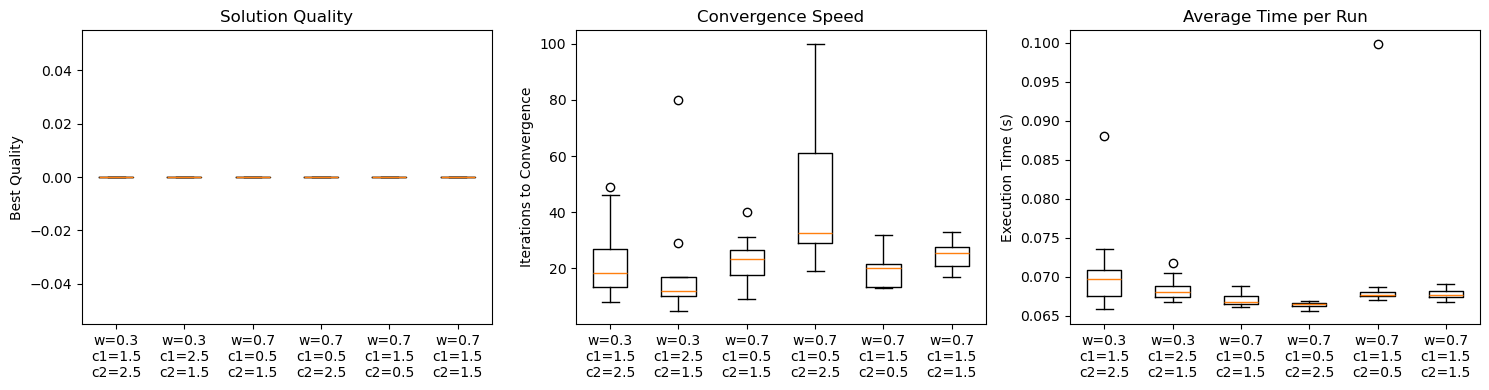


Non-Convergence Analysis:
----------------------------------------
w=0, c1=0, c2=0: 8.521
w=2, c1=5, c2=5: 8.723
w=1.5, c1=0, c2=0: 2.846
w=0.1, c1=0.1, c2=0.1: 0.000


In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np

def pso_with_metrics(objective_func, bounds, dimensions, w, c1, c2,
                     num_particles=30, max_iterations=300):
    swarm = [Particle(dimensions, bounds) for _ in range(num_particles)]
    global_best_value = float('inf')
    global_best_position = None
    convergence_iter = max_iterations

    for iteration in range(max_iterations):
        for particle in swarm:
            current_value = particle.evaluate(objective_func)
            if current_value < global_best_value:
                global_best_value = current_value
                global_best_position = particle.position.copy()

        for particle in swarm:
            particle.update_velocity(global_best_position, w, c1, c2)
            particle.update_position(bounds)

        if global_best_value < 0.1 and convergence_iter == max_iterations:
            convergence_iter = iteration

    return global_best_value, convergence_iter

w_values = [0.3, 0.7, 0.9]
c1_values = [0.5, 1.5, 2.5]
c2_values = [0.5, 1.5, 2.5]
num_trials = 10

results = {}
all_configs = []

for w in w_values:
    for c1 in c1_values:
        for c2 in c2_values:
            config = f"w={w}, c1={c1}, c2={c2}"
            all_configs.append((w, c1, c2, config))
            results[config] = {'quality': [], 'convergence': [], 'time': []}

for w, c1, c2, config in all_configs:
    for trial in range(num_trials):
        start_time = time.time()
        quality, convergence = pso_with_metrics(rastrigin, (-5.12, 5.12), 2, w, c1, c2)
        execution_time = time.time() - start_time

        results[config]['quality'].append(quality)
        results[config]['convergence'].append(convergence)
        results[config]['time'].append(execution_time)

# Best and worst configurations
best_config = min(all_configs, key=lambda x: np.mean(results[x[3]]['quality']))
worst_config = max(all_configs, key=lambda x: np.mean(results[x[3]]['quality']))

print(f"Best: {best_config[3]} | Quality: {np.mean(results[best_config[3]]['quality']):.3f}")
print(f"Worst: {worst_config[3]} | Quality: {np.mean(results[worst_config[3]]['quality']):.3f}")

# Visualization
best_configs = sorted(all_configs, key=lambda x: np.mean(results[x[3]]['quality']))[:6]

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
quality_data = [results[c[3]]['quality'] for c in best_configs]
labels = [f"w={c[0]}\nc1={c[1]}\nc2={c[2]}" for c in best_configs]
plt.boxplot(quality_data, tick_labels=labels)
plt.ylabel("Best Quality")
plt.title("Solution Quality")

plt.subplot(1, 3, 2)
convergence_data = [results[c[3]]['convergence'] for c in best_configs]
plt.boxplot(convergence_data, tick_labels=labels)
plt.ylabel("Iterations to Convergence")
plt.title("Convergence Speed")

plt.subplot(1, 3, 3)
time_data = [results[c[3]]['time'] for c in best_configs]
plt.boxplot(time_data, tick_labels=labels)
plt.ylabel("Execution Time (s)")
plt.title("Average Time per Run")

plt.tight_layout()
plt.show()

print("\nNon-Convergence Analysis:")
print("-" * 40)

problematic_params = [
    (0, 0, 0),      # No movement
    (2, 5, 5),      # Unstable oscillations  
    (1.5, 0, 0),    # Only inertia
    (0.1, 0.1, 0.1) # Too weak
]

for w, c1, c2 in problematic_params:
    quality, convergence = pso_with_metrics(rastrigin, (-5.12, 5.12), 2, w, c1, c2)
    print(f"w={w}, c1={c1}, c2={c2}: {quality:.3f}")


PSO fails to converge when parameters cause either complete stagnation (w=c1=c2=0), divergent flight (high w ≥ 1), chaotic oscillations (high c1,c2 > 4), or insufficient movement (very low parameters). The algorithm requires balanced forces for stable convergence toward the optimum.

<h2> Task 7. Experiment with C1=0 and C2=1 </h2>
<p> Fix other hyperparemeters to meaningful values and use c1=0 and c2=1 </p>
<p> How does PSO behave? Is this reminding you of other algorithm? Why? </p>


Best position: [2.21612112e-09 6.99442966e-10]
Best value: 0.000000


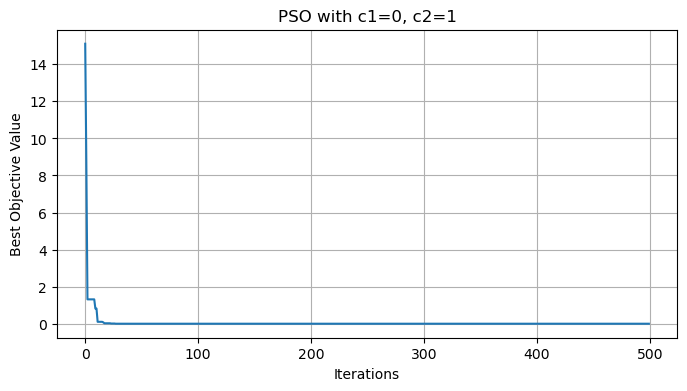

In [3]:
best_position, best_value, history = particle_swarm_optimization(
    rastrigin,
    bounds=(-5.12, 5.12),
    dimensions=2,
    num_particles=30,
    max_iterations=500,
    w=0.7,  
    c1=0.0,  
    c2=1.0   
)

print(f"Best position: {best_position}")
print(f"Best value: {best_value:.6f}")

plt.figure(figsize=(8, 4))
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Best Objective Value")
plt.title("PSO with c1=0, c2=1")
plt.grid(True)
plt.show()


Explain your results:

When c1=0 and c2=1, PSO particles ignore their personal best positions and only move toward the global best, causing all particles to converge along similar trajectories like multiple parallel hill climbers with momentum. This configuration resembles multiple random start Hill Climbing algorithm because it loses the exploration-exploitation balance that characterizes true swarm intelligence, resulting in fast convergence but increased risk of getting trapped in local optima.